In [1]:
#!pip install matplotlib

In [2]:
import pandas as pd
import h2o
from sklearn.model_selection import train_test_split
h2o.init(ip="localhost", port=54323)

Checking whether there is an H2O instance running at http://localhost:54323 . connected.


H2O_cluster_uptime:,20 mins 43 secs
H2O_cluster_timezone:,Europe/Paris
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.3
H2O_cluster_version_age:,3 months and 21 days !!!
H2O_cluster_name:,H2O_from_python_uba_p_2pd8df
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.452 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


In [3]:
transactions = pd.read_csv("C:\\Users\\uba_p\\Downloads\\TFM\\creditcard.csv")

In [4]:
transactions.Class.replace([0, 1], [7, 10], inplace=True)

In [5]:
transactions

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,7
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,7
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,7
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,7
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,7
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,7
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,7
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,7


In [6]:
transactions["Class"]

0         7
1         7
2         7
3         7
4         7
         ..
284802    7
284803    7
284804    7
284805    7
284806    7
Name: Class, Length: 284807, dtype: int64

In [7]:
X = transactions[transactions.columns[1:30]]
y = transactions[transactions.columns[30:31]]
y

,Class
0,7
1,7
2,7
3,7
4,7
...,...
284802,7
284803,7
284804,7
284805,7


In [8]:
transactions_names = list(X.columns)
transactions_names

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [9]:

import pandas as pd
from sklearn import preprocessing

x = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled)

In [10]:
X

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,...,0.582942,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824
1,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,...,0.579530,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105
2,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,...,0.585855,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739
3,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,...,0.578050,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807
4,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,...,0.584615,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.756448,0.873531,0.666991,0.160317,0.729603,0.236810,0.235393,0.863749,0.528729,0.598850,...,0.595979,0.564920,0.515249,0.680500,0.313600,0.658558,0.466291,0.433929,0.329840,0.000030
284803,0.945845,0.766677,0.872678,0.219189,0.771561,0.273661,0.265504,0.788548,0.482925,0.488530,...,0.580900,0.564933,0.553153,0.665619,0.245298,0.543855,0.360884,0.417775,0.312038,0.000965
284804,0.990905,0.764080,0.781102,0.227202,0.783425,0.293496,0.263547,0.792985,0.477677,0.498692,...,0.580280,0.565220,0.537005,0.664877,0.468492,0.592824,0.411177,0.416593,0.312585,0.002642
284805,0.954209,0.772856,0.849587,0.282508,0.763172,0.269291,0.261175,0.792671,0.476287,0.500464,...,0.581622,0.565755,0.547353,0.663008,0.398836,0.545958,0.514746,0.418520,0.315245,0.000389


In [11]:
y = y.to_numpy()
X = X.to_numpy()
# transactions_names = list(transactions_pd.columns)

In [12]:
X

array([[9.35192337e-01, 7.66490419e-01, 8.81364903e-01, ...,
        4.18976135e-01, 3.12696634e-01, 5.82379309e-03],
       [9.78541955e-01, 7.70066651e-01, 8.40298490e-01, ...,
        4.16345145e-01, 3.13422663e-01, 1.04705276e-04],
       [9.35217023e-01, 7.53117667e-01, 8.68140819e-01, ...,
        4.15489266e-01, 3.11911316e-01, 1.47389219e-02],
       ...,
       [9.90904812e-01, 7.64079694e-01, 7.81101998e-01, ...,
        4.16593177e-01, 3.12584864e-01, 2.64215395e-03],
       [9.54208999e-01, 7.72855742e-01, 8.49587129e-01, ...,
        4.18519535e-01, 3.15245157e-01, 3.89238944e-04],
       [9.49231759e-01, 7.65256401e-01, 8.49601462e-01, ...,
        4.16466371e-01, 3.13400843e-01, 8.44648509e-03]])

In [13]:
y = y.squeeze()
X = X.squeeze()

In [14]:
X

array([[9.35192337e-01, 7.66490419e-01, 8.81364903e-01, ...,
        4.18976135e-01, 3.12696634e-01, 5.82379309e-03],
       [9.78541955e-01, 7.70066651e-01, 8.40298490e-01, ...,
        4.16345145e-01, 3.13422663e-01, 1.04705276e-04],
       [9.35217023e-01, 7.53117667e-01, 8.68140819e-01, ...,
        4.15489266e-01, 3.11911316e-01, 1.47389219e-02],
       ...,
       [9.90904812e-01, 7.64079694e-01, 7.81101998e-01, ...,
        4.16593177e-01, 3.12584864e-01, 2.64215395e-03],
       [9.54208999e-01, 7.72855742e-01, 8.49587129e-01, ...,
        4.18519535e-01, 3.15245157e-01, 3.89238944e-04],
       [9.49231759e-01, 7.65256401e-01, 8.49601462e-01, ...,
        4.16466371e-01, 3.13400843e-01, 8.44648509e-03]])

In [15]:
transactions_names

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [16]:
y

array([7, 7, 7, ..., 7, 7, 7], dtype=int64)

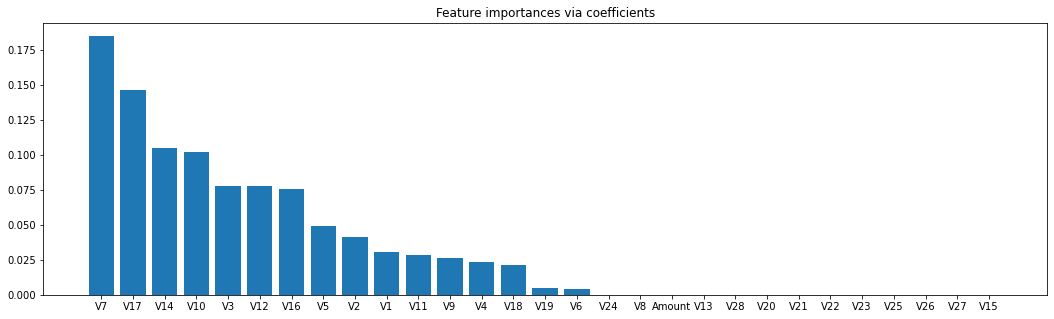

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LassoCV

lasso = LassoCV().fit(X, y)
importance = np.abs(lasso.coef_)
importance_per = importance/sum(importance)  # making it percentual 

feature_names = np.array(transactions_names)
features = np.c_[feature_names, importance]
features = features[features[:, -1].argsort()][::-1]

importance[::-1].sort()
importance_per[::-1].sort()

plt.subplots(figsize=(18,5))
plt.bar(height=importance_per, x=features[:,0])
plt.title("Feature importances via coefficients")
plt.show()

In [14]:
from sklearn.feature_selection import SelectFromModel
from time import time

threshold = np.sort(importance)[-5] + 0.01
print(threshold)
tic = time()
sfm = SelectFromModel(lasso, threshold=threshold).fit(X, y)
toc = time()
print("Features selected by SelectFromModel: "
      f"{feature_names[sfm.get_support()]}")
print(f"Done in {toc - tic:.3f}s")

0.2834716820058695
Features selected by SelectFromModel: ['V7' 'V10' 'V14' 'V17']
Done in 2.923s


C:\Users\uba_p\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\uba_p\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Feature: 0, Score: 0.05194
Feature: 1, Score: 0.27384
Feature: 2, Score: -0.02722
Feature: 3, Score: -0.50057
Feature: 4, Score: 0.33389
Feature: 5, Score: -0.18905
Feature: 6, Score: -0.52813
Feature: 7, Score: 0.28846
Feature: 8, Score: 0.36271
Feature: 9, Score: 0.67725
Feature: 10, Score: -0.04828
Feature: 11, Score: 0.19487
Feature: 12, Score: 0.31898
Feature: 13, Score: 0.59113
Feature: 14, Score: 0.15075
Feature: 15, Score: 0.48406
Feature: 16, Score: 0.01969
Feature: 17, Score: -0.19762
Feature: 18, Score: 0.17720
Feature: 19, Score: -1.23522
Feature: 20, Score: -0.70151
Feature: 21, Score: -0.17385
Feature: 22, Score: 0.37829
Feature: 23, Score: 0.02766
Feature: 24, Score: 0.19370
Feature: 25, Score: 0.04299
Feature: 26, Score: 0.24704
Feature: 27, Score: 0.04900
Feature: 28, Score: 0.00647


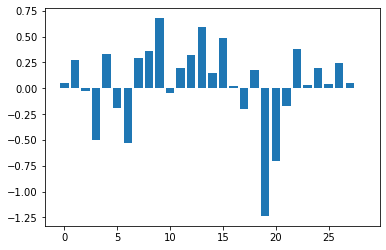

In [65]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.01395
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.01048
Feature: 3, Score: 0.01294
Feature: 4, Score: 0.00389
Feature: 5, Score: 0.00921
Feature: 6, Score: 0.01210
Feature: 7, Score: 0.00907
Feature: 8, Score: 0.00589
Feature: 9, Score: 0.04196
Feature: 10, Score: 0.00936
Feature: 11, Score: 0.04259
Feature: 12, Score: 0.00919
Feature: 13, Score: 0.09898
Feature: 14, Score: 0.01192
Feature: 15, Score: 0.01750
Feature: 16, Score: 0.53507
Feature: 17, Score: 0.00155
Feature: 18, Score: 0.01033
Feature: 19, Score: 0.01379
Feature: 20, Score: 0.00971
Feature: 21, Score: 0.01086
Feature: 22, Score: 0.00946
Feature: 23, Score: 0.01453
Feature: 24, Score: 0.00538
Feature: 25, Score: 0.02013
Feature: 26, Score: 0.04877
Feature: 27, Score: 0.00692
Feature: 28, Score: 0.00447


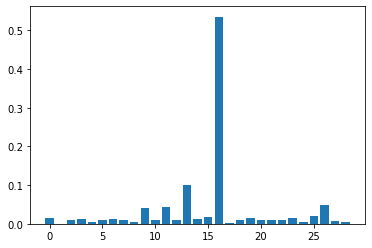

In [64]:
# decision tree for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [106]:
transactions_pd = h2o.import_file("C:\\Users\\uba_p\\Downloads\\TFM\\creditcard.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [115]:
predictors = ["V7", "V17", "V14" ,"V10"]
transactions = transactions_pd[predictors]
transactions

V7,V17,V14,V10
0.239599,0.207971,-0.311169,0.0907942
-0.078803,-0.114805,-0.143772,-0.166974
0.791461,1.10997,-0.165946,0.207643
0.237609,-0.684093,-0.287924,-0.0549519
0.592941,-0.237033,-1.11967,0.753074
0.476201,-0.0581328,-0.137134,-0.371407
-0.005159,0.00282051,0.167372,-0.0992543
1.12063,-1.22213,-1.32387,1.24938
0.370145,-0.499768,0.0743554,-0.41043
0.651583,-0.54098,-0.443523,-0.366846


In [26]:
# Split the dataset into a train and valid set:
train, valid = transactions.split_frame(ratios=[.7], seed=1234)
len(valid)
train

V7,V17
-0.078803,-0.114805
0.791461,1.10997
0.592941,-0.237033
0.476201,-0.0581328
-0.005159,0.00282051
1.12063,-1.22213
0.370145,-0.499768
-1.42324,0.253415
0.470455,-0.809979
-0.689405,0.873936


In [27]:
# Build and train the model:

from h2o.estimators import H2OKMeansEstimator
from h2o.estimators import H2ORandomForestEstimator

tr_kmeans = H2OKMeansEstimator(k=4,
                                 # estimate_k=True,
                                 standardize=True,
                                 seed=1234)

In [28]:
tr_kmeans.train(x=predictors,
                  training_frame=train,
                  validation_frame=valid)

# Eval performance:
perf = tr_kmeans.model_performance()

#  Generate predictions on a validation set (if necessary):
pred = tr_kmeans.predict(valid)

kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans prediction progress: |█████████████████████████████████████████████| 100%


In [31]:
pred

predict
0
0
0
0
0
0
0
0
0
0


In [29]:
transactions_pd = transactions_pd[transactions_pd["Class"] == 1]
transactions_pd = transactions_pd[predictors]

In [30]:
pred[pred["predict"] == 3] 

predict
3
3
3
3
3
3
3
3
3
3


In [113]:
tr_kmeans.predict(transactions_pd).table()

kmeans prediction progress: |█████████████████████████████████████████████| 100%


predict,Count
0,287
2,195
3,10
